In [1]:
import tkinter as tk
from tkinter import filedialog
import pdb
import os
from glob import glob
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import local_binary_pattern
# from skimage.color import rgb2gray
from sklearn import preprocessing
import array
from PIL import Image

In [74]:
#Function to choose the file

In [128]:
def chooseFile(a):
    root=tk.Tk()
    root.withdraw()
    if(a=="1"):
        file_path=filedialog.askopenfilename(initialdir = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\Skirt",title = "Select Image",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
    elif(a=="2"):
        file_path=filedialog.askopenfilename(initialdir = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\Shirt",title = "Select Image",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
    elif(a=="3"):
        file_path=filedialog.askopenfilename(initialdir = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\Dress",title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
    else:
        print("Incorrect Input!")
    return file_path

# Menu for selecting the desired file from 1 of 3 folders

Please input 
 1 for selecting Skirt 
 2 for Shirt and 
 3 for Dress ==>>3


Text(0.5, 1.0, 'Selected Image')

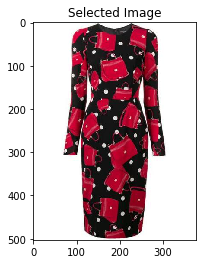

In [154]:
prompt = input("Please input \n 1 for selecting Skirt \n 2 for Shirt and \n 3 for Dress ==>>")
filePath=chooseFile(prompt)

plt.imshow(plt.imread(filePath))
plt.title("Selected Image")

In [155]:
def process(filename, name):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)
    plt.title("{}".format(name))
    
def features(selectedImagePath):
    image = mpimg.imread("{}".format(selectedImagePath))
    g_scale = rgb2gray(image)
    f1, f3=np.histogram(g_scale, bins=256)
    f1 = np.transpose(f1)
    radius =3
    no_points = 8

    numNeighbors = 8;
    numBins = numNeighbors*(numNeighbors-1)+3;
    radius = 59

    f2=(local_binary_pattern(rgb2gray(image),numNeighbors,radius,method='var'))
    f2 = np.transpose(f2)
    f=np.asarray(np.concatenate(((f1),f2[0])))
    return f
    
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def extractFeatures():
    selectedImagePath = filePath
    listdir = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\"
    dirs = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\z_csv_files\\"
#     cat = os.listdir(listdir)[:-1]
    if prompt == "1":
        case = ['Accessories', 'Bags', 'Coat', 'Jacket', 'Jewelry', 'Shoes', 'Shirt']
    elif prompt == "2":
        case = ['Accessories', 'Bags', 'Coat', 'Jacket', 'Jewelry', 'Pants', 'Shoes', 'Shirt']
    elif prompt == "3":
        case = ['Accessories', 'Bags', 'Coat', 'Jacket', 'Jewelry', 'Shoes']
    cat = case
    print(cat)
    for i in range(len(cat)):
        path = "{}_data_Features.csv".format(dirs + cat[i]) 
        if not os.path.exists(path):
            print ("Error: The following file does not exist:\n {}".format(path))
        else:
            try:
                j = 0
                corr = list()
                data = pd.read_csv(path)
                for j in range(len(data.iloc[:,0])):
                    arr = np.array(data.loc[j,:])
                    corr.append(np.min(np.corrcoef(arr[:624], features(selectedImagePath)[:624])))
                    j+=1
                    #Address of directory where ALL EXCEL files are present
                    #name of directory of excel files must be z
                with open("C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\z_csv_files\\{}_data_Name.csv".format(cat[i])) as f:
                    filenames = f.readlines()
                folder_path = "C:\\Users\\D-AI\\Documents\\Python Scripts\\Python wrapper\\{}\\".format(cat[i])
                show_path = ''.join([ele.split(',') for ele in filenames][np.argmin(corr)])
                show_path = folder_path + show_path
                show_path=show_path[:-1]
                process(show_path, cat[i])

            except:
                pass

['Accessories', 'Bags', 'Coat', 'Jacket', 'Jewelry', 'Shoes']


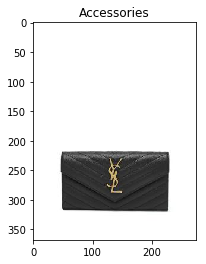

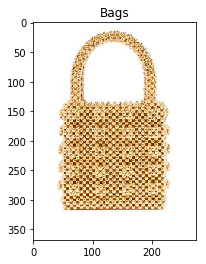

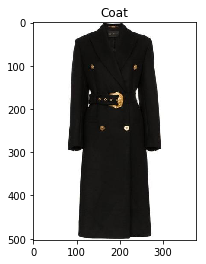

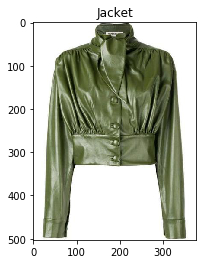

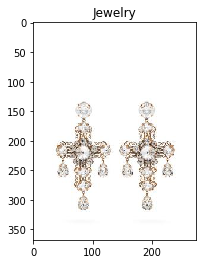

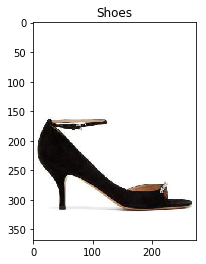

In [156]:
extractFeatures()